# Error Analysis 

This analysis aims to identify which features and their corresponding values are present while the model have mistakes assigning negative labels (FN), assigning positive labels (FP) and both errors, assigning negative and positive labels (FN & FP). 

## Mistakes in assigning negative labels 

(`error_type`: `error_negative_label`)

A Decision Tree (DT) is trained based on the True and False **negative** values assigned by the predicting model. The positive labels (1) are the mistakes (FN), while the negative labels (0) are the asserts of the predictive model for the negative label (TN).  

The output will take the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging negative labels. 

## Mistakes in assigning positive labels 

(`error_type`: `error_positive_label`)

A Decision Tree (DT) is trained based on the True and False **positive** values assigned by the predicting model. The positive labels (1) are the mistakes (FP), while the negative labels (0) are the asserts of the predictive model for the positive label (TP).  

The output will take the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging positive labels. 

## Mistakes in assigning negative and positive labels 

(`error_type`: `error_general_label`)

A Decision Tree (DT) is trained based on the True and False values assigned by the predicting model. The positive labels (1) are the mistakes (FN and FP), while the negative labels (0) are the asserts of the predictive model in both, the positive and negative label (TP and TN).  

The output will refer the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging negative labels. 


###  Hyperparameters 

* Decision Tree: 
    * Depth of the tree, by default the grid includes the values: `1`, `3`, `5`, `10` and `None`. 
* Size of the list (`k`)
    * By default the grid includes the values: `100`, `200`, `300`. 
    
Both can be change in the configuration file of the postmodeling analysis `postmodeling_config.yaml` that has the following structure: s

~~~
error_analysis:
  project_path: "s3://dsapp-social-services-migrated/acdhs_housing/triage_experiments/"

  k: [100, 200, 300]

  model_params:
    max_depth: [1, 3, 5, 10, ~]
~~~

The output is a series of plots related to the feature importance for each combination of `max_depth` and `k` as well as a `png` file for the tree visualization. These files are stored in the `/error_analysis/` path within the project path.


In [1]:
import sys
import os

sys.path.insert(0, "/mnt/data/users/lily/triage/src")
sys.path.append("/home/liliana/.pyenv/versions/triage/lib/python3.10/site-packages")

In [2]:
import yaml

from sqlalchemy import create_engine

from triage.component.postmodeling.error_analysis import (
    generate_error_analysis,
    output_all_analysis,
    output_specific_error_analysis,
    output_specific_configuration
)

### Load Database 

Your database configuration file should have the following structure: 

~~~
host: yourhost
user: youruser
db: databasename
pass: yourpassword
port: portofdb
~~~

In [4]:
# Configure Database, note that the file is expected to be in the same path as this notebook. 
with open('database.yaml') as file:
    dbconfig = yaml.full_load(file)

host= dbconfig['host']
user= dbconfig['user']
database= dbconfig['db']
password= dbconfig['pass']
port= dbconfig['port']

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, password, host, port, database))

db_conn = engine.connect()

The `model_id` must have predictions already persisted in the DB. 

In [4]:
model_id = 1630

In [5]:
error_analysis_results = generate_error_analysis(model_id, db_conn)

2023-02-20 22:04:00 -    INFO Found credentials in shared credentials file: ~/.aws/credentials




    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


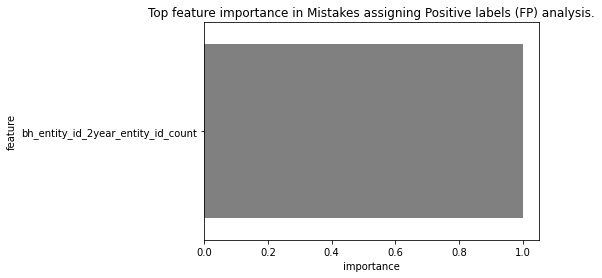


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- weights: [10.00, 86.00] class: 1
|--- bh_entity_id_2year_entity_id_count >  19.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


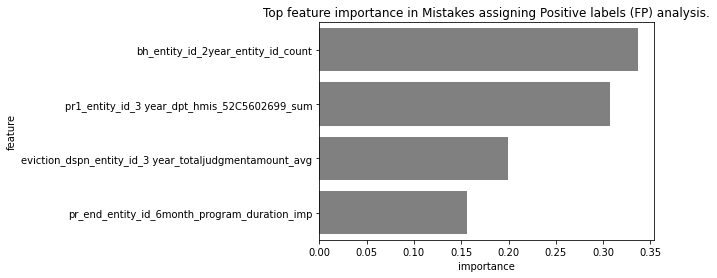


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- weights: [3.00, 84.00] class: 1
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr_end_entity_id_6month_program_duration_imp <= 0.50
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |--- pr_end_entity_id_6month_program_duration_imp >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|--- bh_entity_id_2year_entity_id_count >  19.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_dep

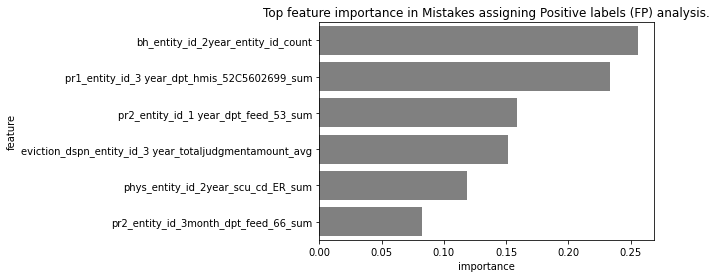


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

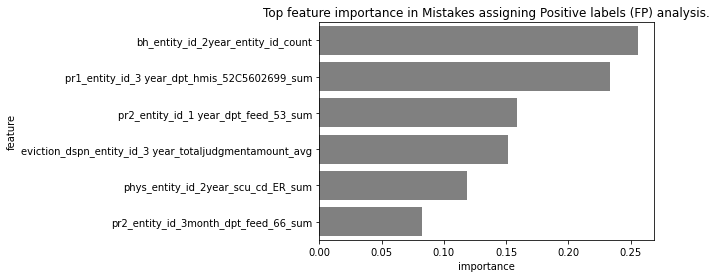


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

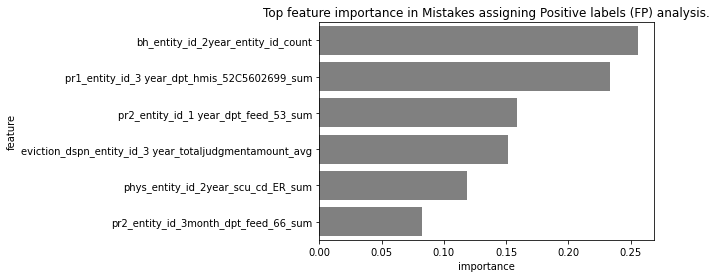


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

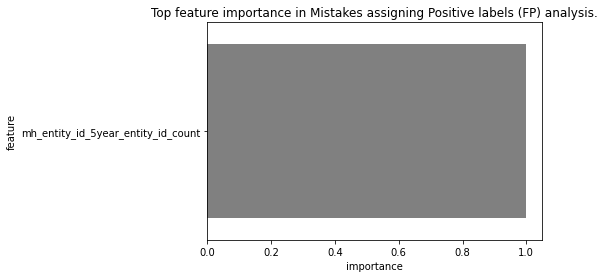


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- weights: [16.00, 180.00] class: 1
|--- mh_entity_id_5year_entity_id_count >  41.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


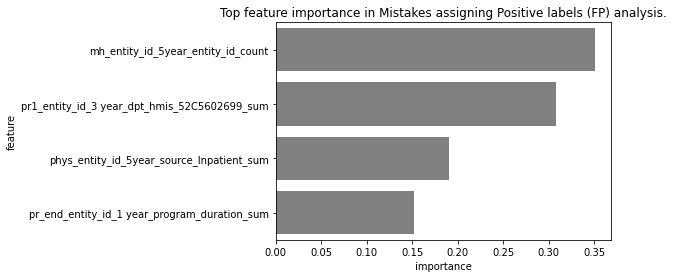


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- weights: [9.00, 178.00] class: 1
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr_end_entity_id_1 year_program_duration_sum <= 345.00
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- pr_end_entity_id_1 year_program_duration_sum >  345.00
|   |   |   |--- weights: [5.00, 0.00] class: 0
|--- mh_entity_id_5year_entity_id_count >  41.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature

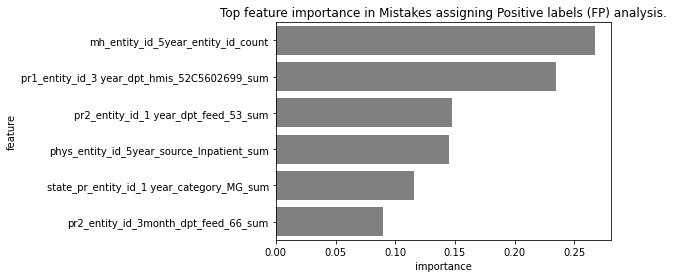


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [4.00, 174.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [3.00, 4.00] class: 1
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- state_pr_entity_id_1 year_category_MG_sum <= 1.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- state_

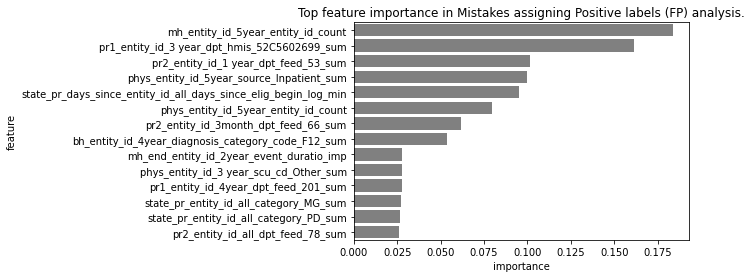


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- bh_entity_id_4year_diagnosis_category_code_F12_sum <= 7.00
|   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_78_sum <= 6.50
|   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 35.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 171.00] class: 1
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  35.50
|   |   |   |   |   |   |   |   |   |--- phys_entity_id_3 year_scu_cd_Other_sum <= 315.00
|   |   |   |   |   |   |   |

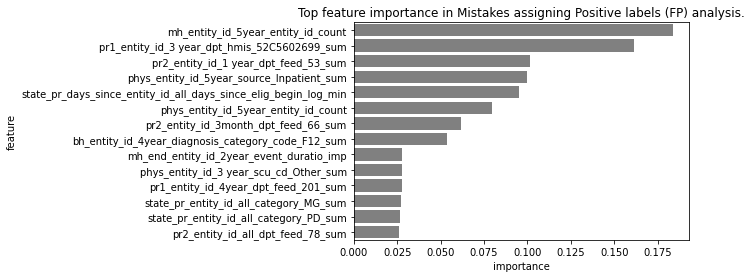


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- bh_entity_id_4year_diagnosis_category_code_F12_sum <= 7.00
|   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_78_sum <= 6.50
|   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 35.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 171.00] class: 1
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  35.50
|   |   |   |   |   |   |   |   |   |--- phys_entity_id_3 year_scu_cd_Other_sum <= 315.00
|   |   |   |   |   |   |   |

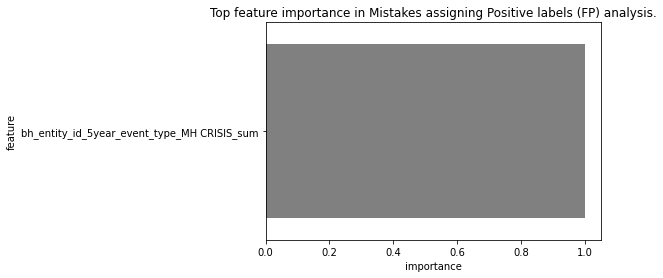


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- weights: [21.00, 275.00] class: 1
|--- bh_entity_id_5year_event_type_MH CRISIS_sum >  33.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


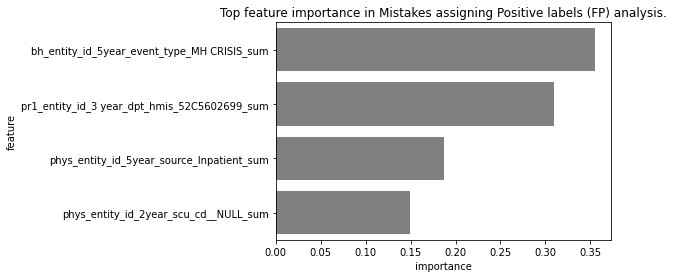


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- weights: [14.00, 273.00] class: 1
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd__NULL_sum <= 0.50
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |--- phys_entity_id_2year_scu_cd__NULL_sum >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|--- bh_entity_id_5year_event_type_MH CRISIS_sum >  33.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top featur

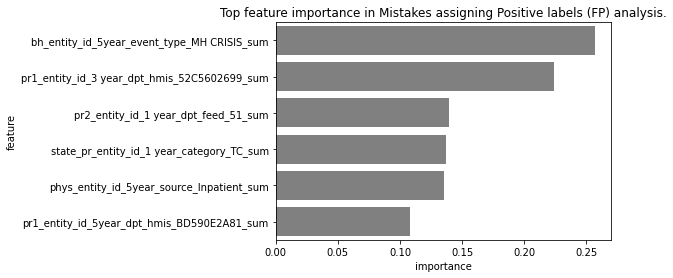


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- weights: [10.00, 273.00] class: 1
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum >  2.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr1_entity_id_5year_dpt_hmis_BD590E2A81_sum <= 1.50
|   |   |   |--- weights: [5.00, 0.00] class:

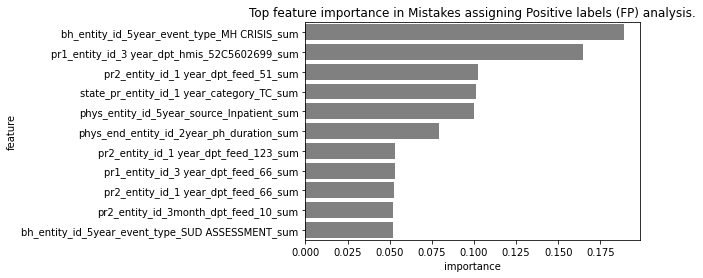


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- bh_entity_id_5year_event_type_SUD ASSESSMENT_sum <= 15.00
|   |   |   |   |   |   |--- pr2_entity_id_3month_dpt_feed_10_sum <= 0.50
|   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 1.50
|   |   |   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_66_sum <= 3.50
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 273.00] class: 1
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum >  0.50
|   |   |   |  

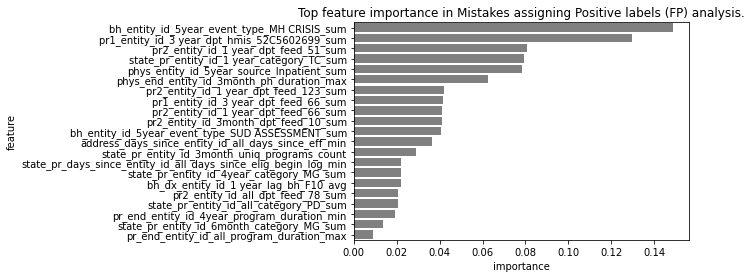


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- bh_entity_id_5year_event_type_SUD ASSESSMENT_sum <= 15.00
|   |   |   |   |   |   |--- pr2_entity_id_3month_dpt_feed_10_sum <= 0.50
|   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 1.50
|   |   |   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_66_sum <= 3.50
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |  

In [6]:
output_specific_error_analysis(error_analysis_results, error_type='error_positive_label')



    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


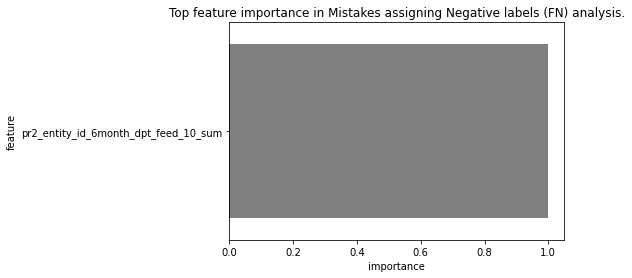


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- weights: [429.00, 11.00] class: 0
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


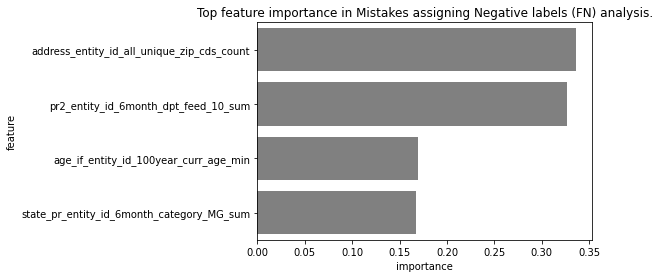


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |--- weights: [419.00, 6.00] class: 0
|   |   |--- state_pr_entity_id_6month_category_MG_sum >  5.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance assoc

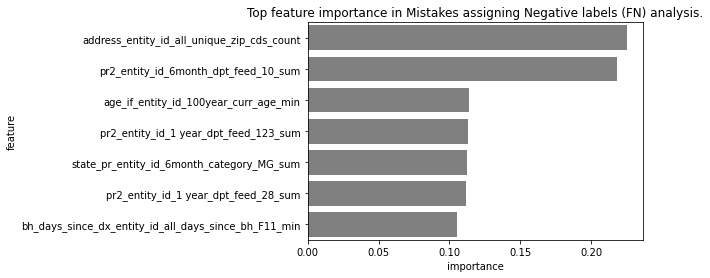


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- weights: [419.00, 4.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dp

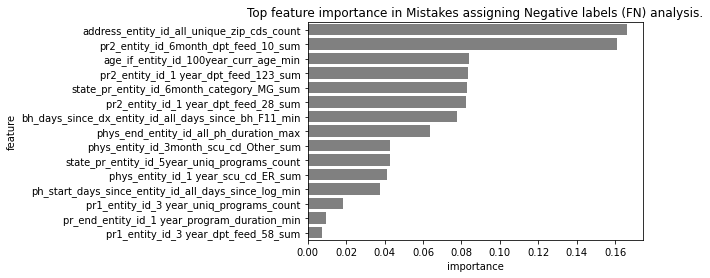


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1

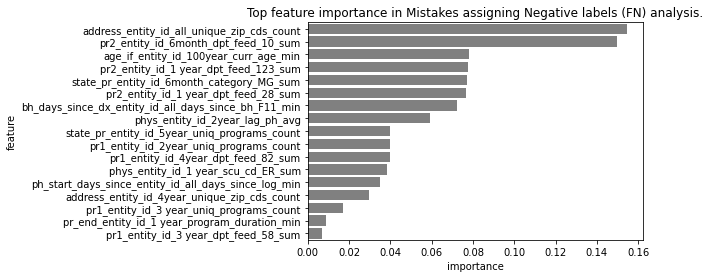


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1

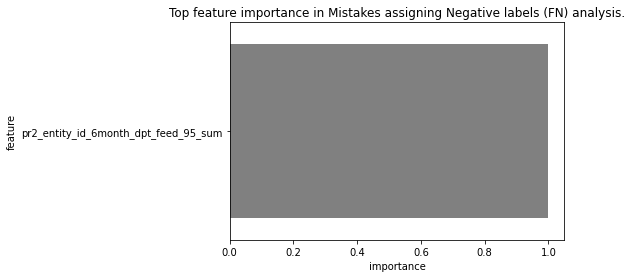


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- weights: [335.00, 5.00] class: 0
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


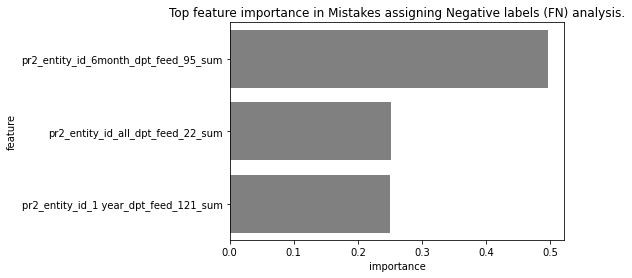


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- weights: [335.00, 3.00] class: 0
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum >  0.50
|   |   |--- weights: [0.00, 1.00] class: 1
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


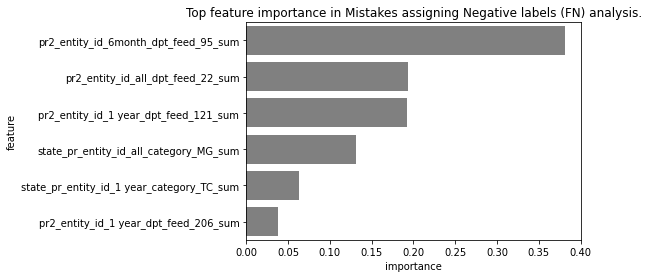


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- weights: [329.00, 1.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 16.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  16.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|   |-

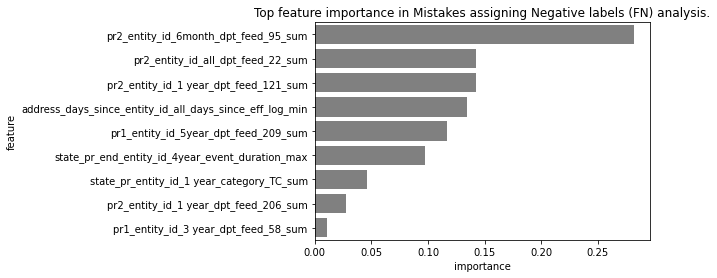


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- weights: [317.00, 0.00] class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--

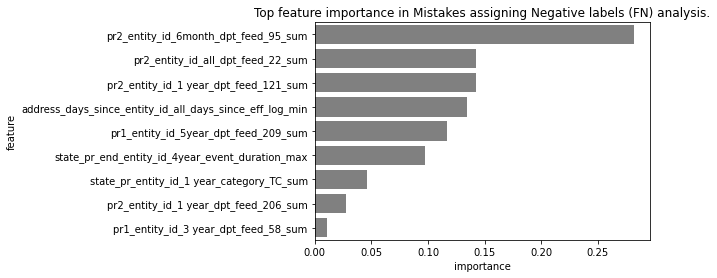


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- weights: [317.00, 0.00] class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--

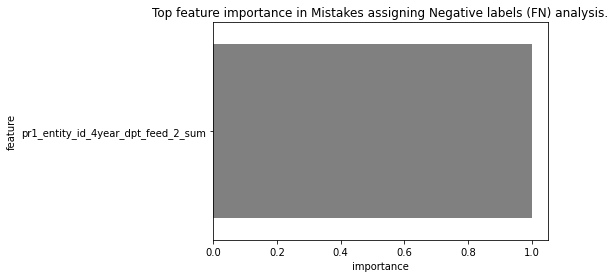


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- weights: [240.00, 1.00] class: 0
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


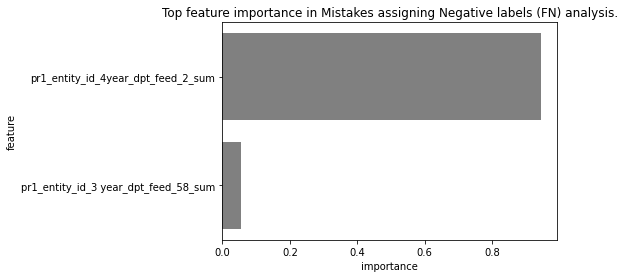


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


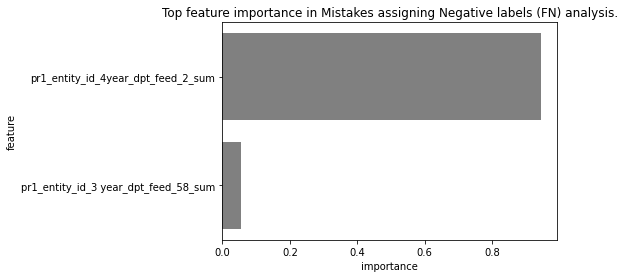


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


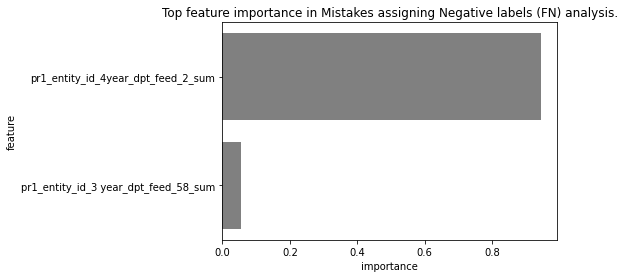


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


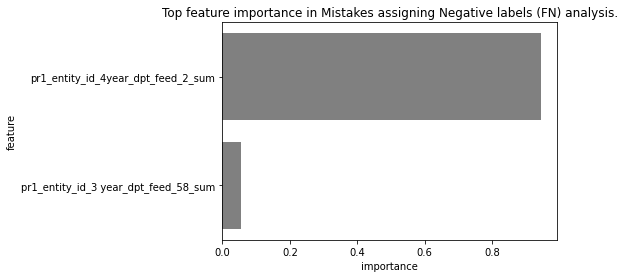


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            
*******************************************


In [7]:
output_specific_error_analysis(error_analysis_results, error_type='error_negative_label')



    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


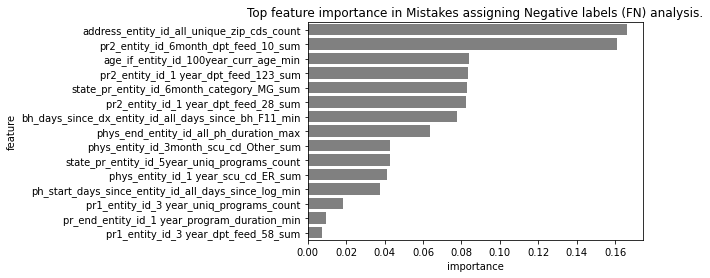


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1

In [8]:
output_specific_configuration(error_analysis_results, error_type="error_negative_label", 
                             k=100, max_depth=10)



    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


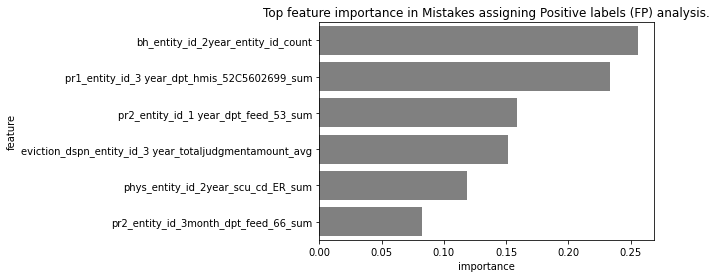


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

In [9]:
output_specific_configuration(error_analysis_results, error_type="error_positive_label", 
                             k=100, max_depth=10)



    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


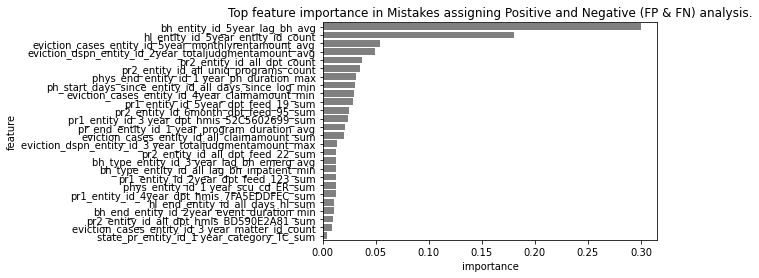


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_2year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |--- bh_type_entity_id_all_lag_bh_inpatient_min <= -0.50
|   |   |   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [389.00, 3.00] class: 0
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |   |   |   |   |   |   |

In [10]:
output_specific_configuration(error_analysis_results, error_type="error_general_label", 
                             k=100, max_depth=10)

Error Analysis
--------------


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


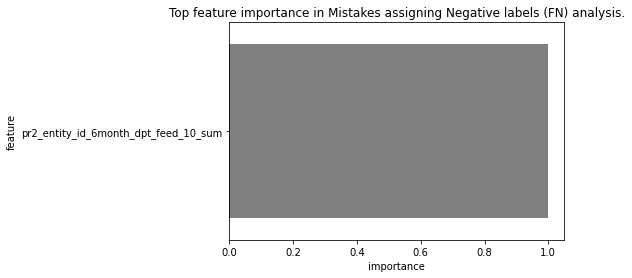


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- weights: [429.00, 11.00] class: 0
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


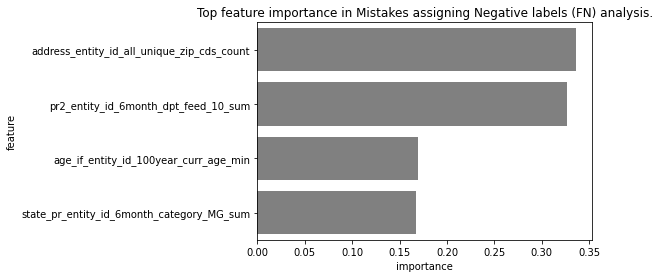


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |--- weights: [419.00, 6.00] class: 0
|   |   |--- state_pr_entity_id_6month_category_MG_sum >  5.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance assoc

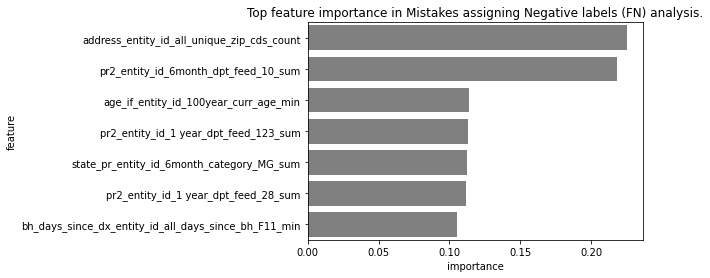


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- weights: [419.00, 4.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dp

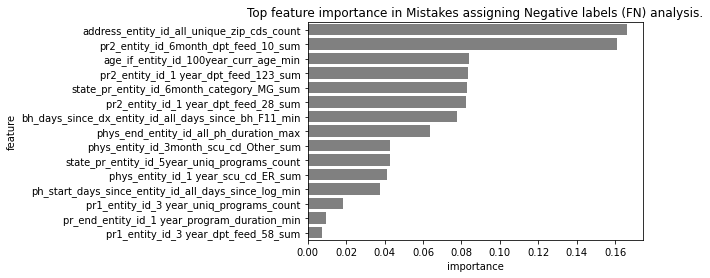


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1

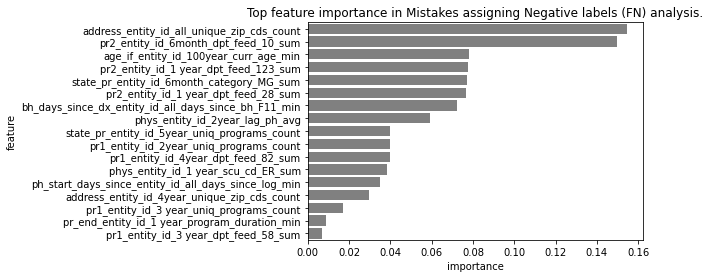


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- weights: [0.00, 3.00] class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1

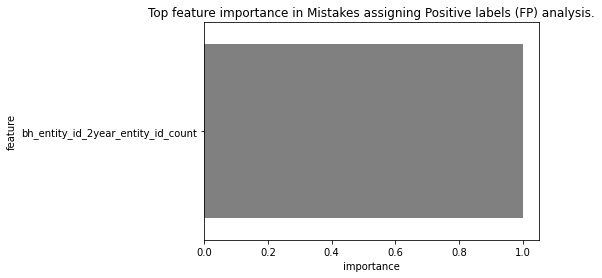


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- weights: [10.00, 86.00] class: 1
|--- bh_entity_id_2year_entity_id_count >  19.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


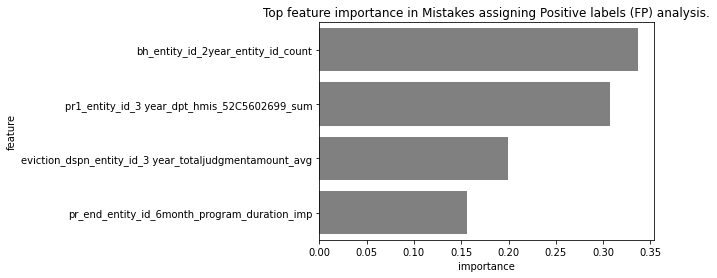


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- weights: [3.00, 84.00] class: 1
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr_end_entity_id_6month_program_duration_imp <= 0.50
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |--- pr_end_entity_id_6month_program_duration_imp >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|--- bh_entity_id_2year_entity_id_count >  19.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_dep

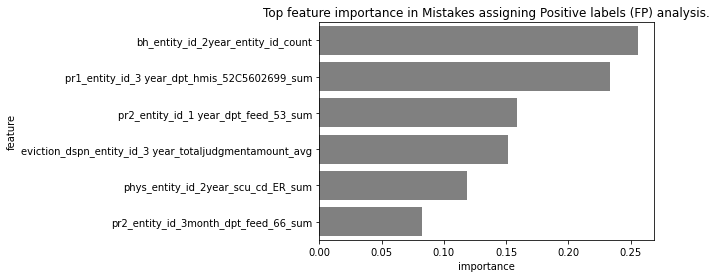


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

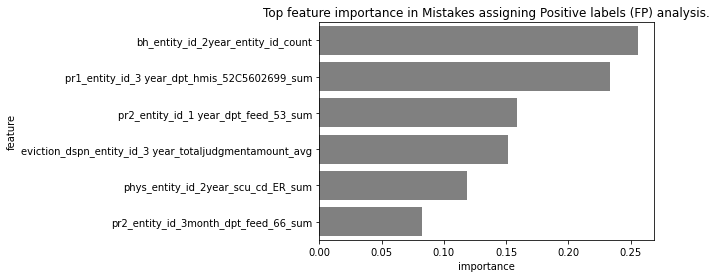


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

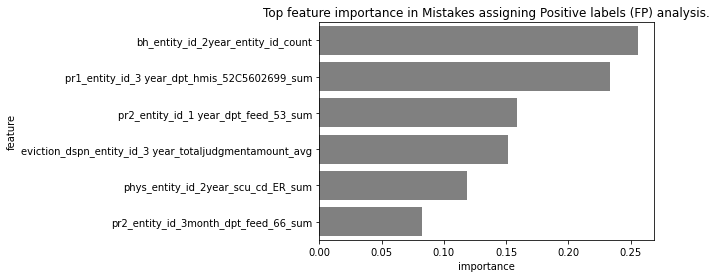


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_2year_entity_id_count <= 19.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg <= 2954.42
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [0.00, 84.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_avg >  2954.42
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd_ER_sum <= 1.00
|   |   |   |--- weights: [0.00, 2.00] class:

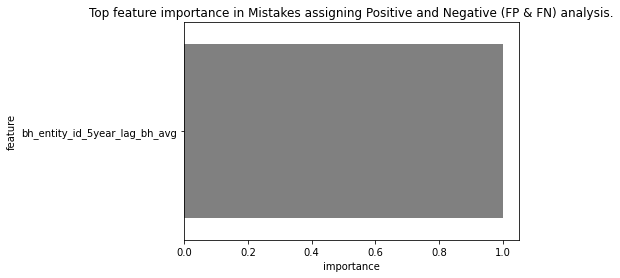


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- weights: [408.00, 39.00] class: 0
|--- bh_entity_id_5year_lag_bh_avg >  0.00
|   |--- weights: [35.00, 60.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


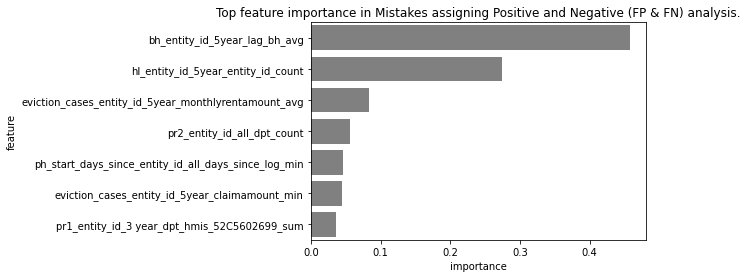


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- weights: [391.00, 11.00] class: 0
|   |   |--- pr2_entity_id_all_dpt_count >  68.50
|   |   |   |--- weights: [14.00, 9.00] class: 0
|   |--- hl_entity_id_5year_entity_id_count >  -0.50
|   |   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |   |--- weights: [0.00, 18.00] class: 1
|   |   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |   |--- weights: [3.00, 1.00] class: 0
|--- bh_entity_id_5year_lag_bh_avg >  0.00
|   |--- eviction_cases_entity_id_5year_monthlyrentamount_avg <= 702.50
|   |   |--- eviction_cases_entity_id_5year_claimamount_min <= 1950.00
|   |   |   |--- weights: [16.00, 56.00] class: 1
|   |   |--- eviction_cases_entity_id_5year_claimamount_min >  1950.00
|   |

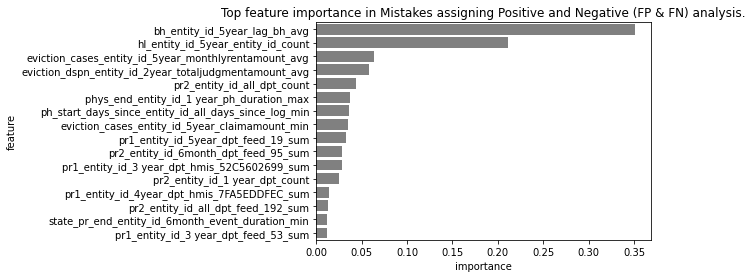


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum <= 0.50
|   |   |   |   |   |--- weights: [391.00, 8.00] class: 0
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- pr2_entity_id_all_dpt_count >  68.50
|   |   |   |--- eviction_dspn_entity_id_2year_totaljudgmentamount_avg <= 735.96
|   |   |   |   |--- pr2_entity_id_1 year_dpt_count <= 2.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_count >  2.00
|

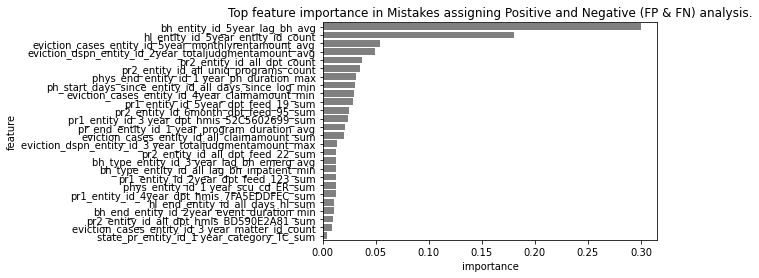


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_2year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |--- bh_type_entity_id_all_lag_bh_inpatient_min <= -0.50
|   |   |   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [389.00, 3.00] class: 0
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |   |   |   |   |   |   |

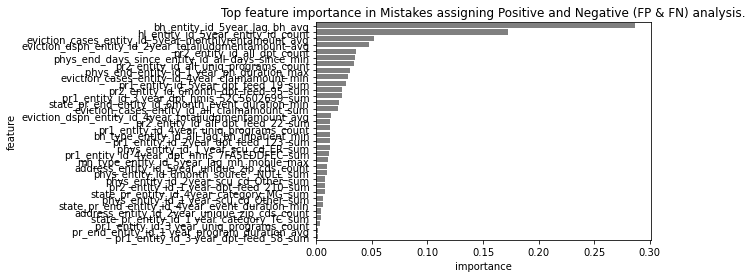


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_2year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |--- bh_type_entity_id_all_lag_bh_inpatient_min <= -0.50
|   |   |   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [311.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   | 

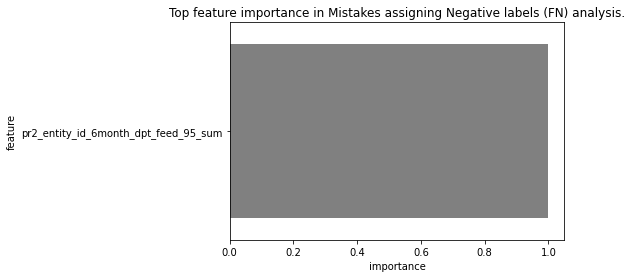


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- weights: [335.00, 5.00] class: 0
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


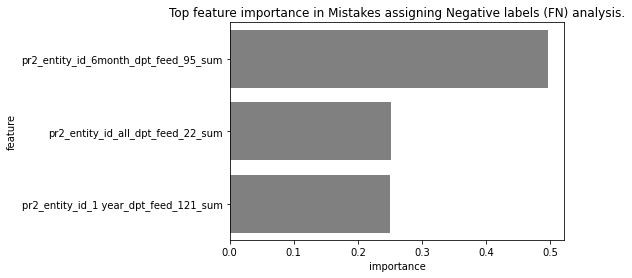


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- weights: [335.00, 3.00] class: 0
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum >  0.50
|   |   |--- weights: [0.00, 1.00] class: 1
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- weights: [0.00, 2.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


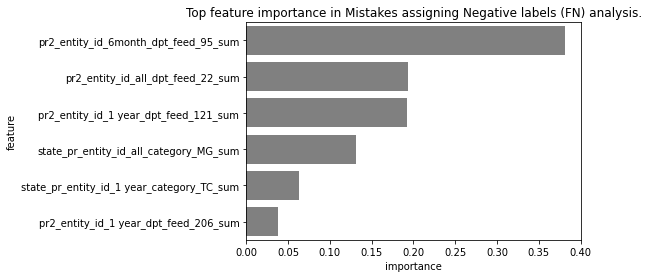


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- weights: [329.00, 1.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 16.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  16.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|   |-

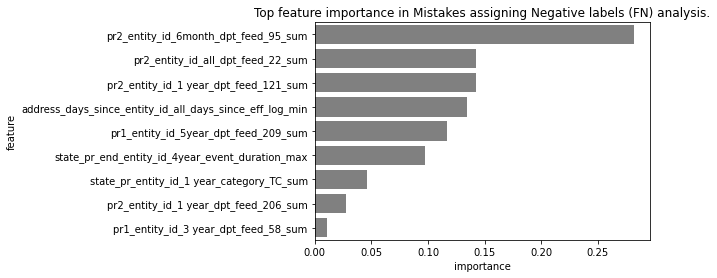


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- weights: [317.00, 0.00] class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--

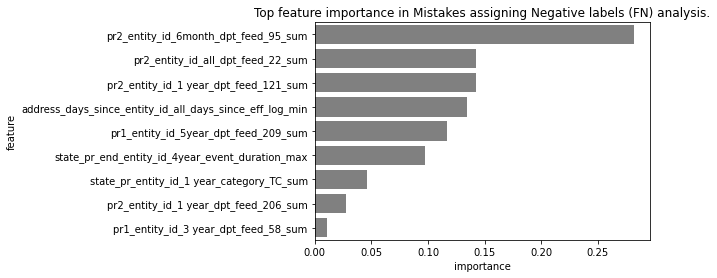


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- weights: [317.00, 0.00] class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--

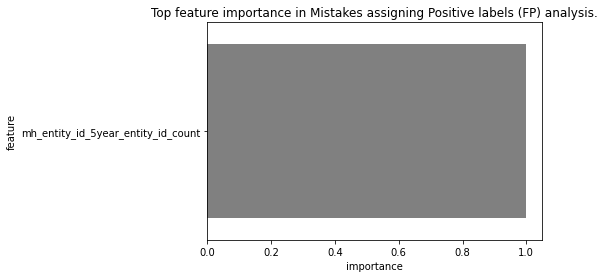


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- weights: [16.00, 180.00] class: 1
|--- mh_entity_id_5year_entity_id_count >  41.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


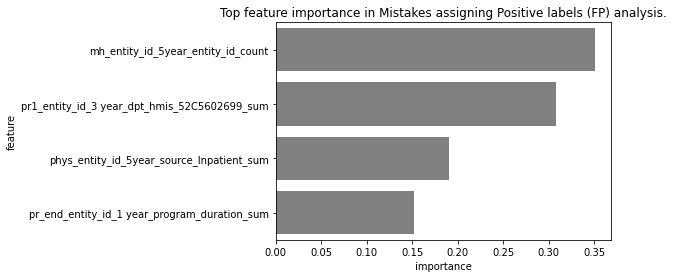


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- weights: [9.00, 178.00] class: 1
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr_end_entity_id_1 year_program_duration_sum <= 345.00
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- pr_end_entity_id_1 year_program_duration_sum >  345.00
|   |   |   |--- weights: [5.00, 0.00] class: 0
|--- mh_entity_id_5year_entity_id_count >  41.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature

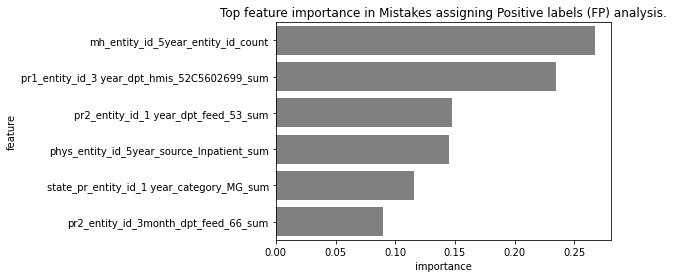


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [4.00, 174.00] class: 1
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [3.00, 4.00] class: 1
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum >  2.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- state_pr_entity_id_1 year_category_MG_sum <= 1.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- state_

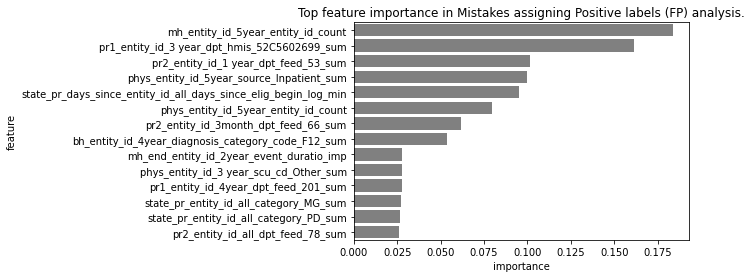


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- bh_entity_id_4year_diagnosis_category_code_F12_sum <= 7.00
|   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_78_sum <= 6.50
|   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 35.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 171.00] class: 1
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  35.50
|   |   |   |   |   |   |   |   |   |--- phys_entity_id_3 year_scu_cd_Other_sum <= 315.00
|   |   |   |   |   |   |   |

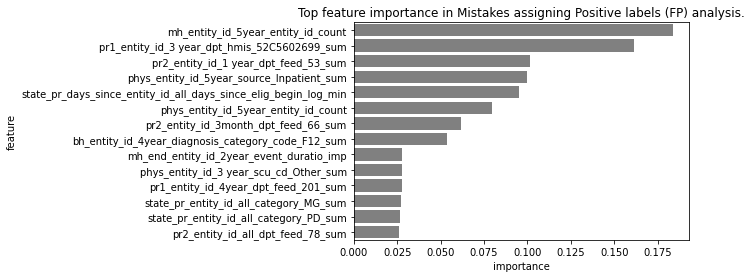


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- mh_entity_id_5year_entity_id_count <= 41.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- pr2_entity_id_1 year_dpt_feed_53_sum <= 2.50
|   |   |   |   |--- pr2_entity_id_3month_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- bh_entity_id_4year_diagnosis_category_code_F12_sum <= 7.00
|   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_78_sum <= 6.50
|   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 35.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 171.00] class: 1
|   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  35.50
|   |   |   |   |   |   |   |   |   |--- phys_entity_id_3 year_scu_cd_Other_sum <= 315.00
|   |   |   |   |   |   |   |

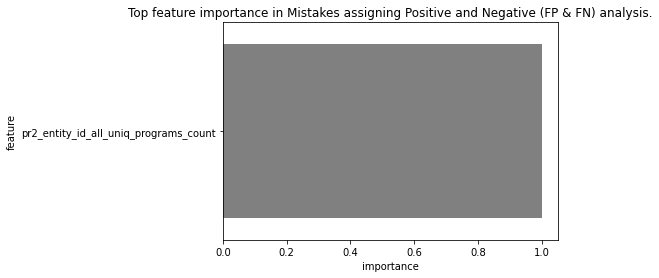


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_uniq_programs_count <= 18.50
|   |--- weights: [304.00, 51.00] class: 0
|--- pr2_entity_id_all_uniq_programs_count >  18.50
|   |--- weights: [51.00, 136.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


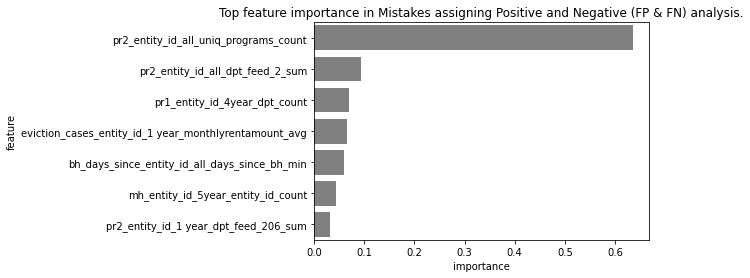


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_uniq_programs_count <= 18.50
|   |--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |--- weights: [211.00, 6.00] class: 0
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |--- weights: [1.00, 3.00] class: 1
|   |--- pr2_entity_id_all_dpt_feed_2_sum >  0.50
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_avg <= 12.50
|   |   |   |--- weights: [22.00, 27.00] class: 1
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_avg >  12.50
|   |   |   |--- weights: [70.00, 15.00] class: 0
|--- pr2_entity_id_all_uniq_programs_count >  18.50
|   |--- pr1_entity_id_4year_dpt_count <= 19.50
|   |   |--- bh_days_since_entity_id_all_days_since_bh_min <= 2899.00
|   |   |   |--- weights: [2.00, 16.00] class: 1
|   |   |--- bh_days_since_entity_id_all_days_since

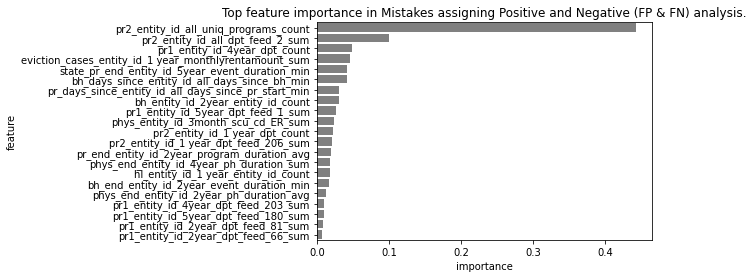


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_uniq_programs_count <= 18.50
|   |--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |--- phys_end_entity_id_2year_ph_duration_avg <= 1.00
|   |   |   |   |--- pr1_entity_id_4year_dpt_feed_203_sum <= 2.00
|   |   |   |   |   |--- weights: [210.00, 3.00] class: 0
|   |   |   |   |--- pr1_entity_id_4year_dpt_feed_203_sum >  2.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- phys_end_entity_id_2year_ph_duration_avg >  1.00
|   |   |   |   |--- pr1_entity_id_2year_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- pr1_entity_id_2year_dpt_feed_66_sum >  0.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |--- pr1_entity_id_2year_dpt_feed_81_s

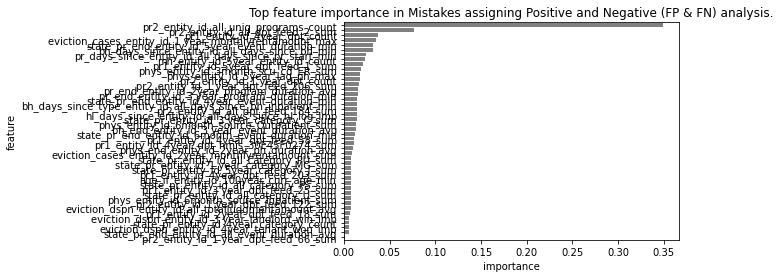


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_uniq_programs_count <= 18.50
|   |--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |--- phys_end_entity_id_2year_ph_duration_avg <= 1.00
|   |   |   |   |--- pr1_entity_id_4year_dpt_feed_203_sum <= 2.00
|   |   |   |   |   |--- state_pr_entity_id_1 year_category_MG_sum <= 6.50
|   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |   |   |--- weights: [183.00, 0.00] class: 0
|   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum >  0.50
|   |   |   |   |   |   |   |--- eviction_dspn_entity_id_all_totaljudgmentamount_avg <= 3753.98
|   |   |   |   |   |   |   |   |--- age_if_entity_id_100year_curr_age_min <= 45.50
|   |   |   |   |   |   |   |   |   |--- weights: [27.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- age_if_entity_id_1

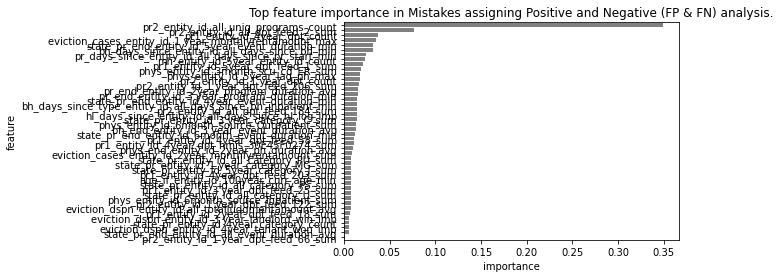


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_uniq_programs_count <= 18.50
|   |--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |--- phys_end_entity_id_2year_ph_duration_avg <= 1.00
|   |   |   |   |--- pr1_entity_id_4year_dpt_feed_203_sum <= 2.00
|   |   |   |   |   |--- state_pr_entity_id_1 year_category_MG_sum <= 6.50
|   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 0.50
|   |   |   |   |   |   |   |--- weights: [183.00, 0.00] class: 0
|   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum >  0.50
|   |   |   |   |   |   |   |--- eviction_dspn_entity_id_all_totaljudgmentamount_avg <= 3753.98
|   |   |   |   |   |   |   |   |--- age_if_entity_id_100year_curr_age_min <= 45.50
|   |   |   |   |   |   |   |   |   |--- weights: [27.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- age_if_entity_id_1

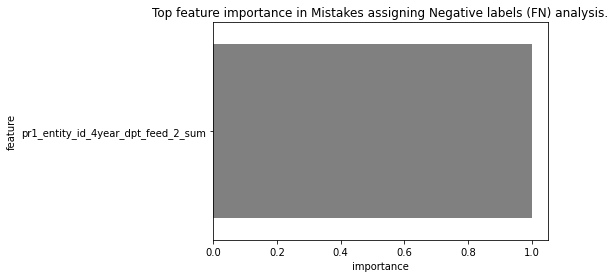


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- weights: [240.00, 1.00] class: 0
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


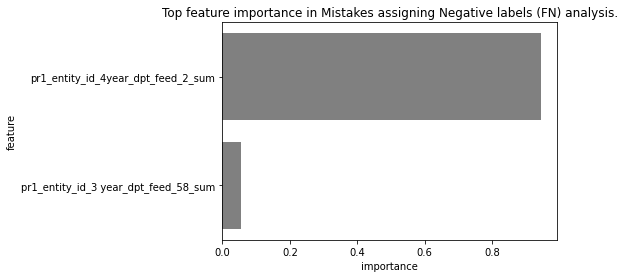


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


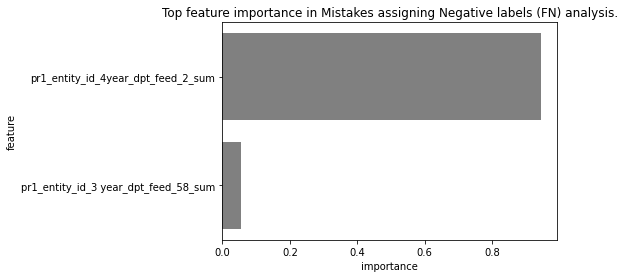


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


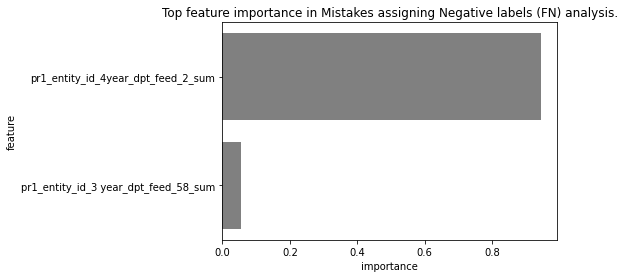


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 300
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


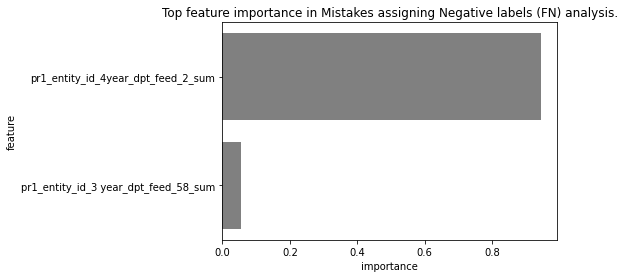


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    
|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- weights: [232.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- weights: [0.00, 1.00] class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- weights: [0.00, 1.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 300
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


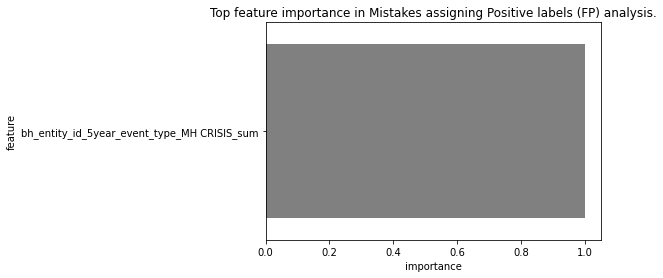


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- weights: [21.00, 275.00] class: 1
|--- bh_entity_id_5year_event_type_MH CRISIS_sum >  33.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


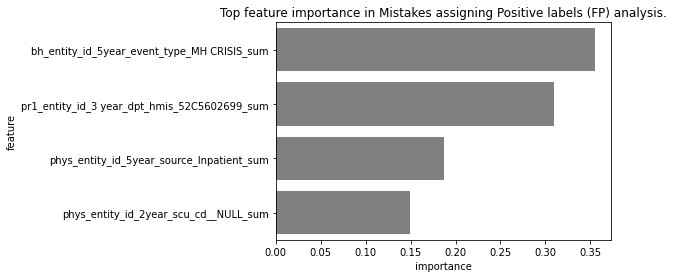


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- weights: [14.00, 273.00] class: 1
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- phys_entity_id_2year_scu_cd__NULL_sum <= 0.50
|   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |--- phys_entity_id_2year_scu_cd__NULL_sum >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: 1
|--- bh_entity_id_5year_event_type_MH CRISIS_sum >  33.00
|   |--- weights: [4.00, 0.00] class: 0

             ######            


    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top featur

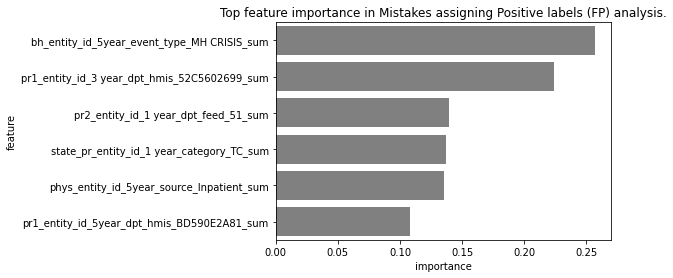


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- weights: [10.00, 273.00] class: 1
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum >  2.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- phys_entity_id_5year_source_Inpatient_sum >  15.00
|   |   |   |--- weights: [2.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum >  0.50
|   |   |--- pr1_entity_id_5year_dpt_hmis_BD590E2A81_sum <= 1.50
|   |   |   |--- weights: [5.00, 0.00] class:

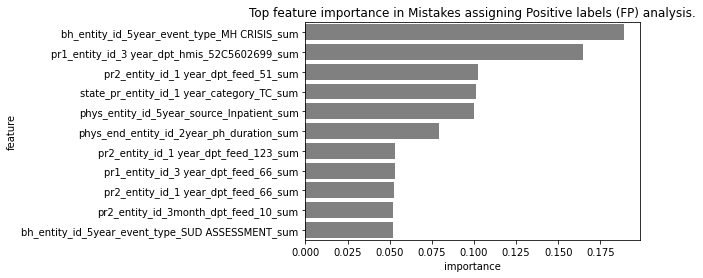


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- bh_entity_id_5year_event_type_SUD ASSESSMENT_sum <= 15.00
|   |   |   |   |   |   |--- pr2_entity_id_3month_dpt_feed_10_sum <= 0.50
|   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 1.50
|   |   |   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_66_sum <= 3.50
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 273.00] class: 1
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum >  0.50
|   |   |   |  

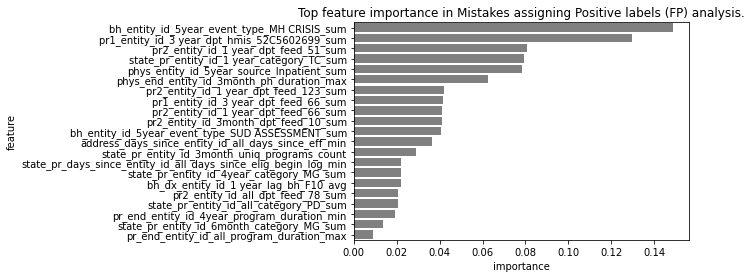


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    
|--- bh_entity_id_5year_event_type_MH CRISIS_sum <= 33.00
|   |--- pr1_entity_id_3 year_dpt_hmis_52C5602699_sum <= 0.50
|   |   |--- phys_entity_id_5year_source_Inpatient_sum <= 15.00
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_51_sum <= 2.50
|   |   |   |   |   |--- bh_entity_id_5year_event_type_SUD ASSESSMENT_sum <= 15.00
|   |   |   |   |   |   |--- pr2_entity_id_3month_dpt_feed_10_sum <= 0.50
|   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_66_sum <= 1.50
|   |   |   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_66_sum <= 3.50
|   |   |   |   |   |   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_all_category_PD_sum <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |  

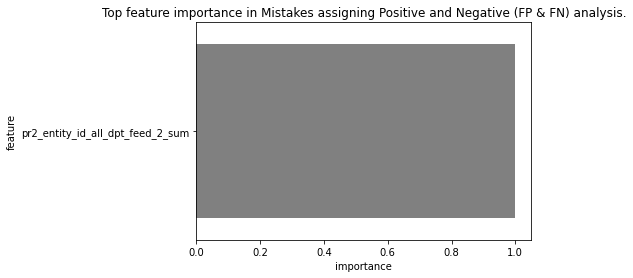


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |--- weights: [183.00, 39.00] class: 0
|--- pr2_entity_id_all_dpt_feed_2_sum >  0.50
|   |--- weights: [82.00, 238.00] class: 1

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


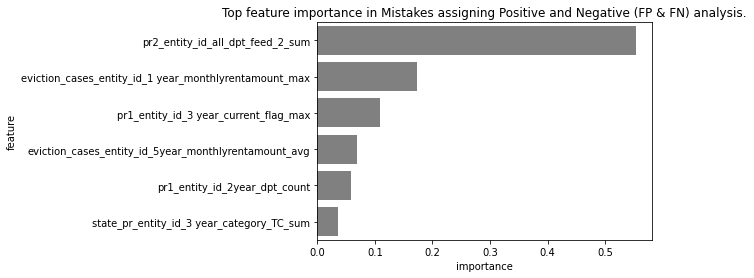


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |--- pr1_entity_id_3 year_current_flag_max <= 0.50
|   |   |--- weights: [122.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_current_flag_max >  0.50
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max <= -0.50
|   |   |   |--- weights: [5.00, 32.00] class: 1
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max >  -0.50
|   |   |   |--- weights: [56.00, 7.00] class: 0
|--- pr2_entity_id_all_dpt_feed_2_sum >  0.50
|   |--- eviction_cases_entity_id_5year_monthlyrentamount_avg <= 702.50
|   |   |--- state_pr_entity_id_3 year_category_TC_sum <= 0.50
|   |   |   |--- weights: [37.00, 191.00] class: 1
|   |   |--- state_pr_entity_id_3 year_category_TC_sum >  0.50
|   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- eviction_cases_entity_id_5year_monthlyrentamount_avg >  702.50
|   |   |--- pr1_entity

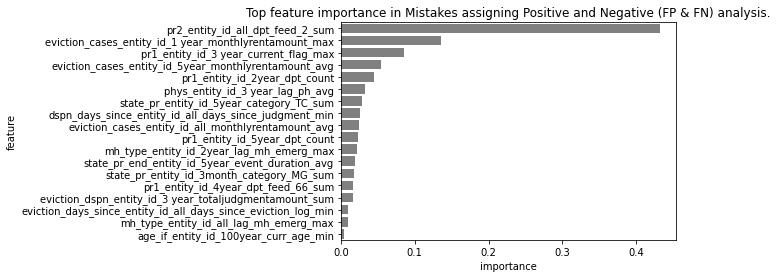


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |--- pr1_entity_id_3 year_current_flag_max <= 0.50
|   |   |--- weights: [122.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_current_flag_max >  0.50
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max <= -0.50
|   |   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_sum <= 5250.88
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min <= 27.50
|   |   |   |   |   |--- weights: [0.00, 21.00] class: 1
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min >  27.50
|   |   |   |   |   |--- weights: [3.00, 11.00] class: 1
|   |   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_sum >  5250.88
|   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max >  -0.50
|   |   |   |--- pr1_entity_id_4year_dpt_feed_66_sum <= 2.50
|   |  

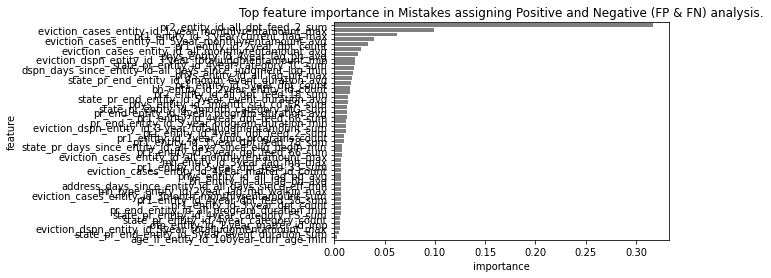


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |--- pr1_entity_id_3 year_current_flag_max <= 0.50
|   |   |--- weights: [122.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_current_flag_max >  0.50
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max <= -0.50
|   |   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_sum <= 5250.88
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min <= 27.50
|   |   |   |   |   |--- weights: [0.00, 21.00] class: 1
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min >  27.50
|   |   |   |   |   |--- pr_end_entity_id_3 year_program_duration_min <= 75.50
|   |   |   |   |   |   |--- weights: [0.00, 10.00] class: 1
|   |   |   |   |   |--- pr_end_entity_id_3 year_program_duration_min >  75.50
|   |   |   |   |   |   |--- eviction_dspn_entity_id_5year_totaljudgmentamount_max <= 1198.24
|   |   |   |   |   |  

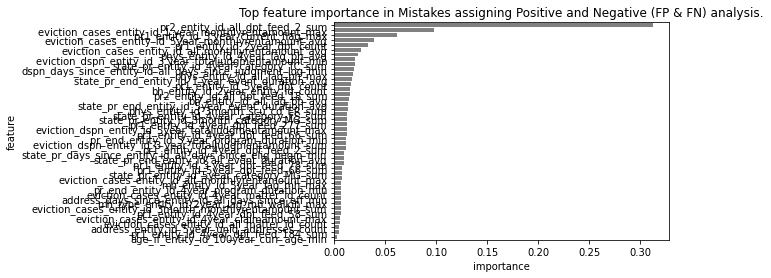


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- pr2_entity_id_all_dpt_feed_2_sum <= 0.50
|   |--- pr1_entity_id_3 year_current_flag_max <= 0.50
|   |   |--- weights: [122.00, 0.00] class: 0
|   |--- pr1_entity_id_3 year_current_flag_max >  0.50
|   |   |--- eviction_cases_entity_id_1 year_monthlyrentamount_max <= -0.50
|   |   |   |--- eviction_dspn_entity_id_3 year_totaljudgmentamount_sum <= 5250.88
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min <= 27.50
|   |   |   |   |   |--- weights: [0.00, 21.00] class: 1
|   |   |   |   |--- age_if_entity_id_100year_curr_age_min >  27.50
|   |   |   |   |   |--- pr_end_entity_id_3 year_program_duration_min <= 75.50
|   |   |   |   |   |   |--- weights: [0.00, 10.00] class: 1
|   |   |   |   |   |--- pr_end_entity_id_3 year_program_duration_min >  75.50
|   |   |   |   |   |   |--- eviction_dspn_entity_id_5year_totaljudgmentamount_max <= 1198.24
|   |   |   |   |   |  

In [11]:
output_all_analysis(error_analysis_results)



    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


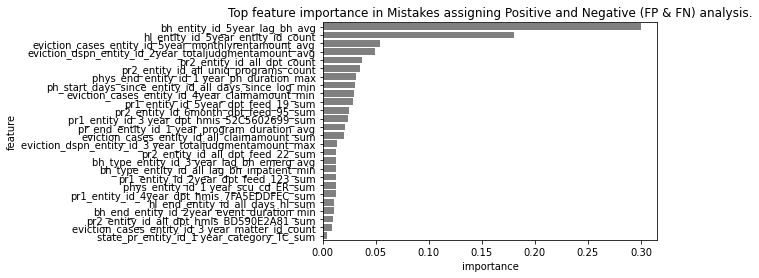


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    
|--- bh_entity_id_5year_lag_bh_avg <= 0.00
|   |--- hl_entity_id_5year_entity_id_count <= -0.50
|   |   |--- pr2_entity_id_all_dpt_count <= 68.50
|   |   |   |--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |   |   |   |--- pr1_entity_id_4year_dpt_hmis_7FA5EDDFEC_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_2year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |   |   |--- bh_type_entity_id_all_lag_bh_inpatient_min <= -0.50
|   |   |   |   |   |   |   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [389.00, 3.00] class: 0
|   |   |   |   |   |   |   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |   |   |   |   |   |   |

In [12]:
output_specific_configuration(error_analysis_results, error_type="error_general_label", 
                             k=100, max_depth=10)